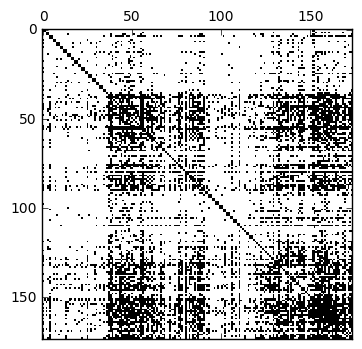

In [2]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np

data = np.loadtxt('cal500',delimiter = ',')
data.shape
with open('label2.txt') as f:
    label = f.readlines()

A = data[:,-len(label):]
np.rint(A)

B = np.dot(A.transpose(),A)
B.shape

C = (B==0)
ExclMat = C.astype(int) 
for i in range(0,174): 
    for j in range(0,174):
        if i==j:
            ExclMat[i,j]=1
            
plt.spy(ExclMat) 
plt.show()

In [3]:
A.shape

(502, 174)

In [4]:
bal_ratio = np.zeros((ExclMat.shape))
acc_1 = np.zeros((ExclMat.shape))

for i in range(ExclMat.shape[0]):
    for j in range(ExclMat.shape[1]):
        if ExclMat[i,j] != 0 and i!= j:
            bal_ratio[i,j] = round(4*float(sum(A[:,i])*sum(A[:,j]))/ 502/502,2)

In [44]:
cluster_List = [[i] for i in range(ExclMat.shape[0])]
for _ in range(len(cluster_List)):
    max_sim = 0
    max_i = []
    max_j =[]
    fusion_ij = []
    for i in range(len(cluster_List)):
        for j in range(i+1, len(cluster_List)):
            class_i = np.sum(A[:,cluster_List[i]],axis = 1)
            class_j = np.sum(A[:,cluster_List[j]],axis = 1)
            if np.dot(class_i,class_j) == 0:
                sim = round(4*float((sum(class_i)*sum(class_j))/(sum(class_i)+sum(class_j))),2)
                if sim > max_sim:
                    max_sim = sim 
                    fusion_ij = cluster_List[i]+cluster_List[j]
                    max_i = cluster_List[i]
                    max_j = cluster_List[j]
    if max_sim == 0: 
        break
    cluster_List.remove(max_i)
    cluster_List.remove(max_j)
    cluster_List.append(fusion_ij)
    
cluster_List

[[70],
 [73],
 [79],
 [119],
 [123],
 [127],
 [128],
 [138],
 [166],
 [6, 7],
 [32, 33],
 [8, 21],
 [16, 17],
 [95, 96],
 [10, 11],
 [99, 100],
 [18, 19],
 [2, 3],
 [26, 27],
 [97, 98],
 [22, 23],
 [103, 104],
 [12, 13],
 [24, 25],
 [30, 31],
 [107, 108],
 [0, 1],
 [101, 102],
 [124, 147],
 [93, 94],
 [75, 170],
 [53, 118],
 [81, 133],
 [4, 5],
 [120, 134],
 [164, 72, 157],
 [85, 125],
 [105, 106],
 [57, 135],
 [162, 52, 167],
 [47, 76, 40, 84],
 [140, 126, 141],
 [139, 130, 142],
 [172, 136, 45, 58, 163],
 [109, 110],
 [111, 152],
 [90, 68, 64, 74],
 [69, 155],
 [131, 78, 60, 86],
 [129, 61, 36, 83],
 [37, 20, 49],
 [88, 151, 42, 67, 82],
 [51, 63, 144],
 [48, 112],
 [158, 160, 159, 50, 54, 59, 150],
 [168, 156, 114, 115],
 [41, 146, 145, 148],
 [38, 116, 117],
 [173, 34, 35],
 [137, 14, 15],
 [143, 91, 92],
 [44, 9, 171],
 [80, 77, 122, 161, 153, 62, 149],
 [121, 169],
 [154, 43, 28, 29],
 [55, 165, 39, 66, 65, 71],
 [132, 46, 56, 87, 89, 113]]

In [68]:
from sklearn.linear_model import LogisticRegression

cluster = np.sort(cluster_List)

graph_matrix = np.zeros(ExclMat.shape)

for k in range(len(cluster)):
    X_index=[]
    cluster[k] = sorted(cluster[k])
    
    for l in range(len(cluster)):
        if l!=k:
            X_index = X_index+cluster[l][:]
    
    for i in range(len(cluster[k])):
        X = A[:,X_index]
        y = A[:,cluster[k][i]]
        lr = LogisticRegression(penalty='l1', C = 0.5)
        lr.fit(X,y)
        coef = lr.coef_
        for _ in range(len(cluster[k])):
            coef = np.insert(coef,cluster[k][_],3.14)
        print coef.shape 
        graph_matrix[cluster[k][i]] = coef


(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)
(174,)

In [69]:
np.round(graph_matrix,2)
for i in range(graph_matrix.shape[0]):
    for j in range(graph_matrix.shape[1]):
        if graph_matrix[i,j]!= 0:
            print label[i],label[j],graph_matrix[i,j]

"EmotionAngryAgressive01"
"EmotionAngryAgressive01"
3.14
"EmotionAngryAgressive01"
"NOTEmotionAngryAgressive01"
3.14
"EmotionAngryAgressive01"
"NOTEmotionBizarreWeird01"
-0.495811214628
"EmotionAngryAgressive01"
"NOTEmotionCalmingSoothing01"
0.843243591524
"EmotionAngryAgressive01"
"NOTEmotionCarefreeLighthearted01"
0.431083585407
"EmotionAngryAgressive01"
"EmotionCheerfulFestive01"
-0.258501179518
"EmotionAngryAgressive01"
"NOTEmotionEmotionalPassionate01"
-0.603863775555
"EmotionAngryAgressive01"
"EmotionExcitingThrilling01"
-0.108816853259
"EmotionAngryAgressive01"
"NOTEmotionHappy01"
0.467539503421
"EmotionAngryAgressive01"
"EmotionLightPlayful01"
-0.202038236946
"EmotionAngryAgressive01"
"NOTEmotionLovingRomantic01"
0.979458730524
"EmotionAngryAgressive01"
"NOTEmotionPleasantComfortable01"
-0.852881223179
"EmotionAngryAgressive01"
"NOTEmotionPositiveOptimistic01"
0.412531236423
"EmotionAngryAgressive01"
"NOTEmotionTenderSoft01"
0.111006642876
"EmotionAngryAgressive01"
"GenreBritPo

In [50]:
i = 0 
temp = 0
cluster
for k in range(len(cluster)):
    X_index=[]
    for l in range(len(cluster)):
        if l!=k:
            X_index = X_index+cluster[l][:]
    print X_index


ValueError: operands could not be broadcast together with shapes (0,) (2,) 

In [51]:
cluster

array([array([0, 1]), array([2, 3]), [4, 5], [6, 7], [8, 21], [10, 11],
       [12, 13], [16, 17], [18, 19], [22, 23], [24, 25], [26, 27],
       [30, 31], [32, 33], [37, 20, 49], [38, 116, 117],
       [41, 146, 145, 148], [44, 9, 171], [47, 76, 40, 84], [48, 112],
       [51, 63, 144], [53, 118], [55, 165, 39, 66, 65, 71], [57, 135],
       [69, 155], [70], [73], [75, 170], [79],
       [80, 77, 122, 161, 153, 62, 149], [81, 133], [85, 125],
       [88, 151, 42, 67, 82], [90, 68, 64, 74], [93, 94], [95, 96],
       [97, 98], [99, 100], [101, 102], [103, 104], [105, 106], [107, 108],
       [109, 110], [111, 152], [119], [120, 134], [121, 169], [123],
       [124, 147], [127], [128], [129, 61, 36, 83], [131, 78, 60, 86],
       [132, 46, 56, 87, 89, 113], [137, 14, 15], [138], [139, 130, 142],
       [140, 126, 141], [143, 91, 92], [154, 43, 28, 29],
       [158, 160, 159, 50, 54, 59, 150], [162, 52, 167], [164, 72, 157],
       [166], [168, 156, 114, 115], [172, 136, 45, 58, 163], [1